In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('household_power_consumption.txt', sep=';')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3378: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


# EDA

In [4]:
# Step 1: Check for missing values
missing_values = data.isnull().sum()

# Step 2: Convert 'Date' and 'Time' columns into a datetime format and set it as an index
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data = data.set_index('DateTime')
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Step 3: Convert numeric columns to numeric types, errors='coerce' will convert non-numeric values to NaN
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Check for any new missing values after conversion
new_missing_values = data.isnull().sum()

# Step 4: Provide summary statistics of the dataset
summary_stats = data.describe()

missing_values, new_missing_values, summary_stats


(Date                         0
 Time                         0
 Global_active_power          0
 Global_reactive_power        0
 Voltage                      0
 Global_intensity             0
 Sub_metering_1               0
 Sub_metering_2               0
 Sub_metering_3           25979
 dtype: int64,
 Global_active_power      25979
 Global_reactive_power    25979
 Voltage                  25979
 Global_intensity         25979
 Sub_metering_1           25979
 Sub_metering_2           25979
 Sub_metering_3           25979
 dtype: int64,
        Global_active_power  Global_reactive_power       Voltage  \
 count         2.049280e+06           2.049280e+06  2.049280e+06   
 mean          1.091615e+00           1.237145e-01  2.408399e+02   
 std           1.057294e+00           1.127220e-01  3.239987e+00   
 min           7.600000e-02           0.000000e+00  2.232000e+02   
 25%           3.080000e-01           4.800000e-02  2.389900e+02   
 50%           6.020000e-01           1.000000e-01

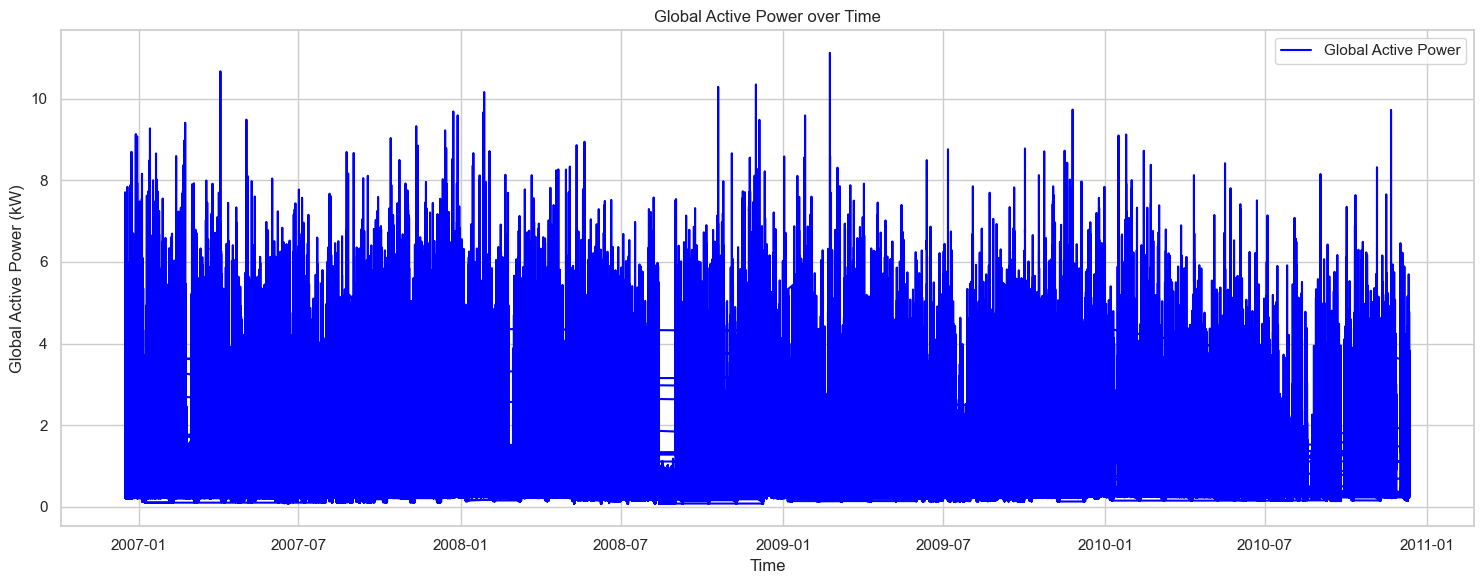

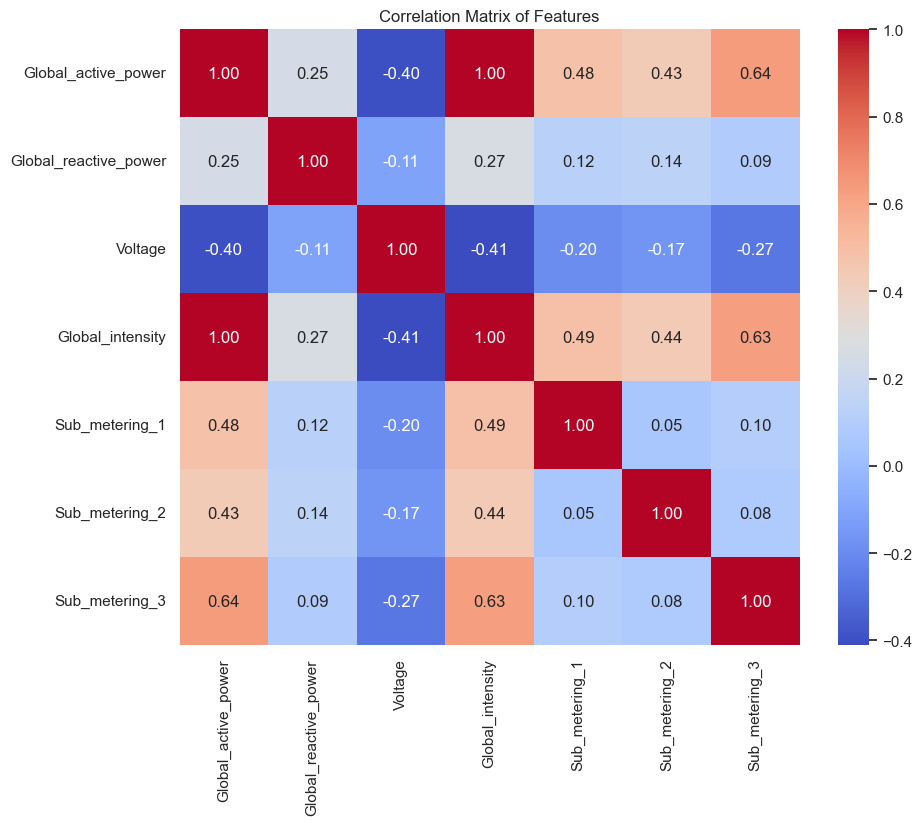

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Plotting Global_active_power trends over time
plt.figure(figsize=(15, 6))
plt.plot(data.index, data['Global_active_power'], label='Global Active Power', color='blue')
plt.title('Global Active Power over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.tight_layout()

# Plotting correlations among features
plt.figure(figsize=(10, 8))
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')

plt.show()


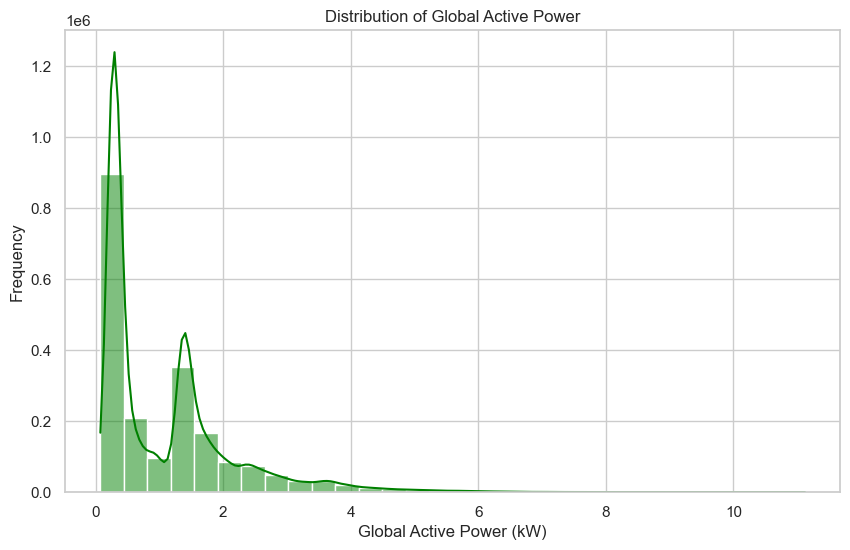

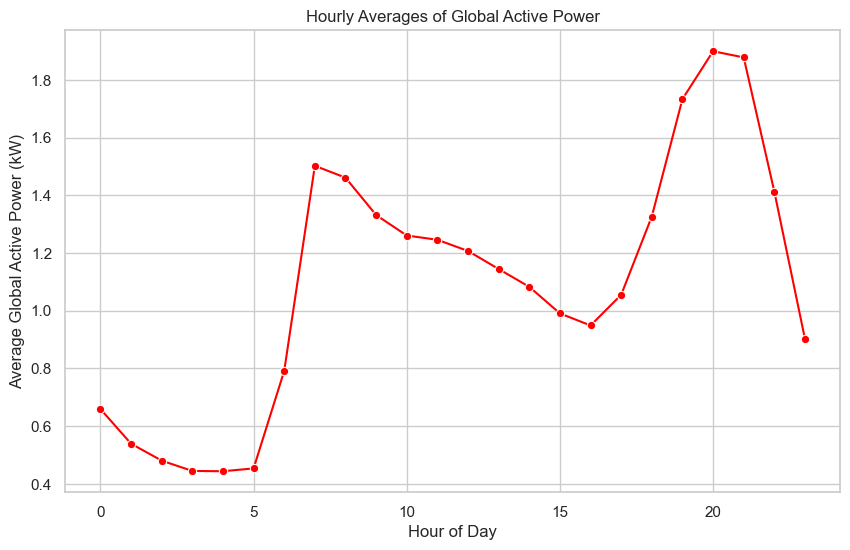

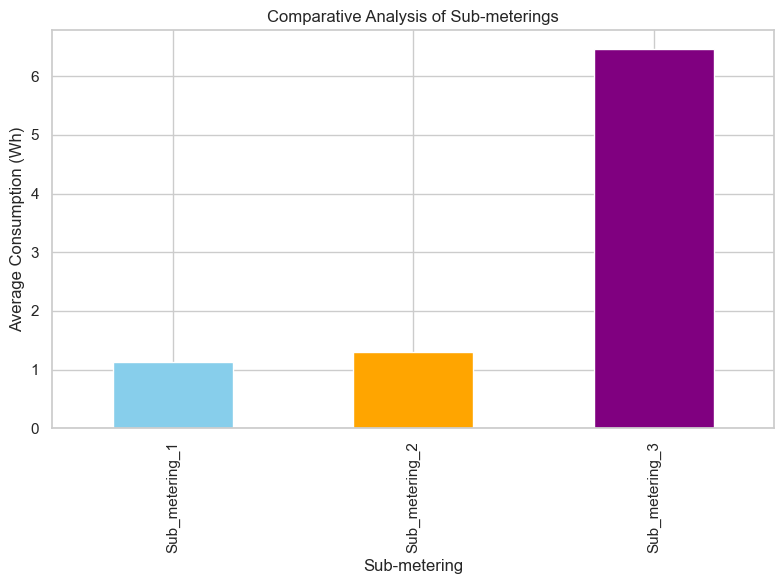

In [6]:
# Setting up additional data columns for detailed analysis
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['Hour'] = data.index.hour
data['Weekday'] = data.index.weekday

# Distribution of Global Active Power
plt.figure(figsize=(10, 6))
sns.histplot(data['Global_active_power'], bins=30, kde=True, color='green')
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')

# Hourly Averages of Global Active Power
hourly_avg = data.groupby('Hour')['Global_active_power'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o', color='red')
plt.title('Hourly Averages of Global Active Power')
plt.xlabel('Hour of Day')
plt.ylabel('Average Global Active Power (kW)')

# Comparative Analysis of Sub-meterings
sub_meterings = data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
plt.figure(figsize=(8, 6))
sub_meterings.plot(kind='bar', color=['skyblue', 'orange', 'purple'])
plt.title('Comparative Analysis of Sub-meterings')
plt.xlabel('Sub-metering')
plt.ylabel('Average Consumption (Wh)')

plt.tight_layout()
plt.show()


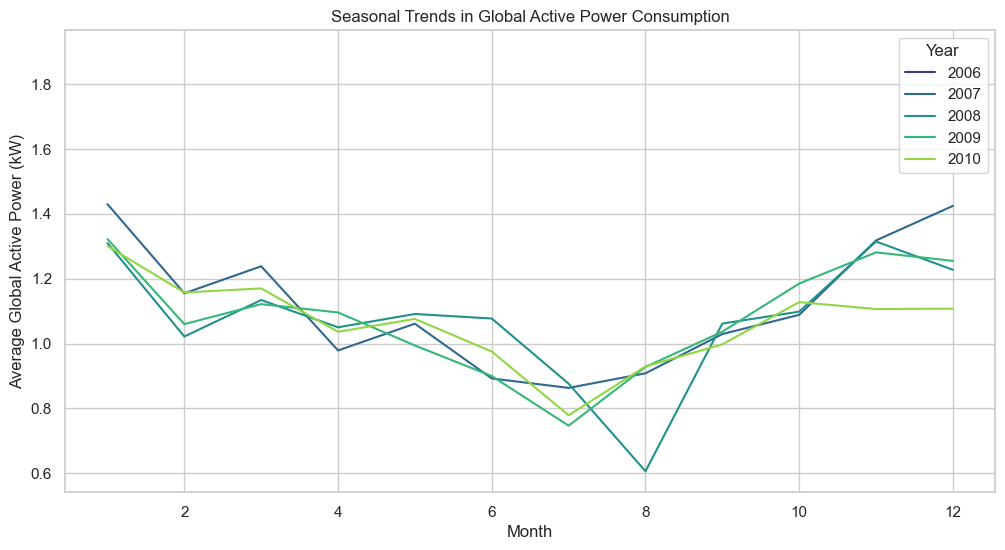

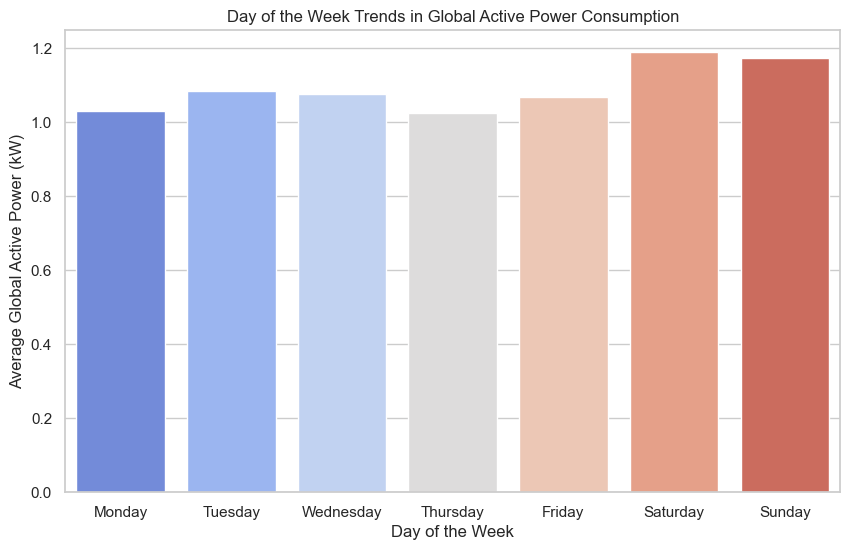

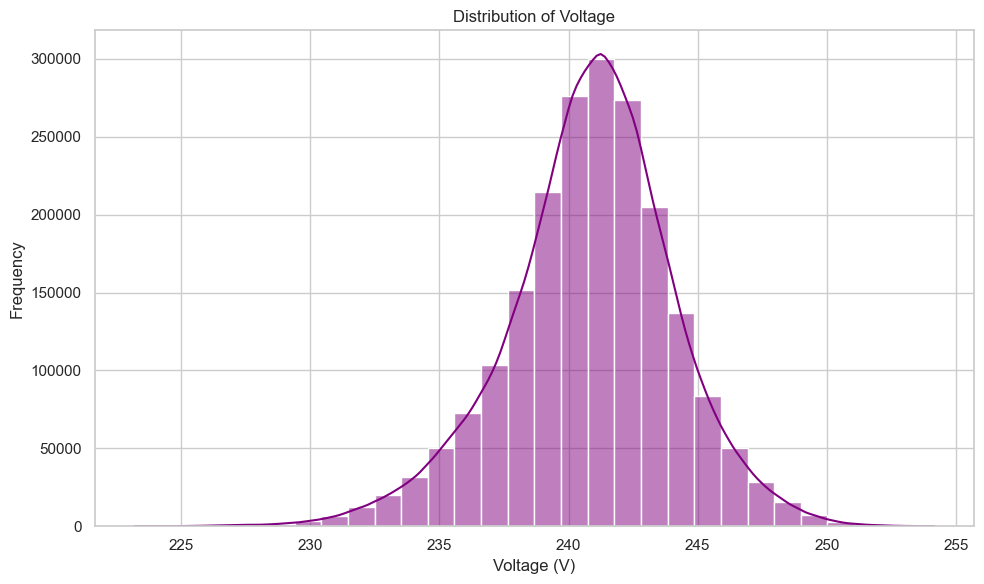

In [7]:
# Seasonal Trends in Power Consumption
monthly_avg = data.groupby(['Year', 'Month'])['Global_active_power'].mean().unstack(level=0)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, palette='viridis', dashes=False)
plt.title('Seasonal Trends in Global Active Power Consumption')
plt.xlabel('Month')
plt.ylabel('Average Global Active Power (kW)')
plt.legend(title='Year', loc='upper right')

# Day of the Week Trends in Power Consumption
weekday_avg = data.groupby('Weekday')['Global_active_power'].mean()
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values, palette='coolwarm')
plt.xticks(ticks=range(7), labels=weekday_labels)
plt.title('Day of the Week Trends in Global Active Power Consumption')
plt.xlabel('Day of the Week')
plt.ylabel('Average Global Active Power (kW)')

# Voltage Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Voltage'], bins=30, kde=True, color='purple')
plt.title('Distribution of Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


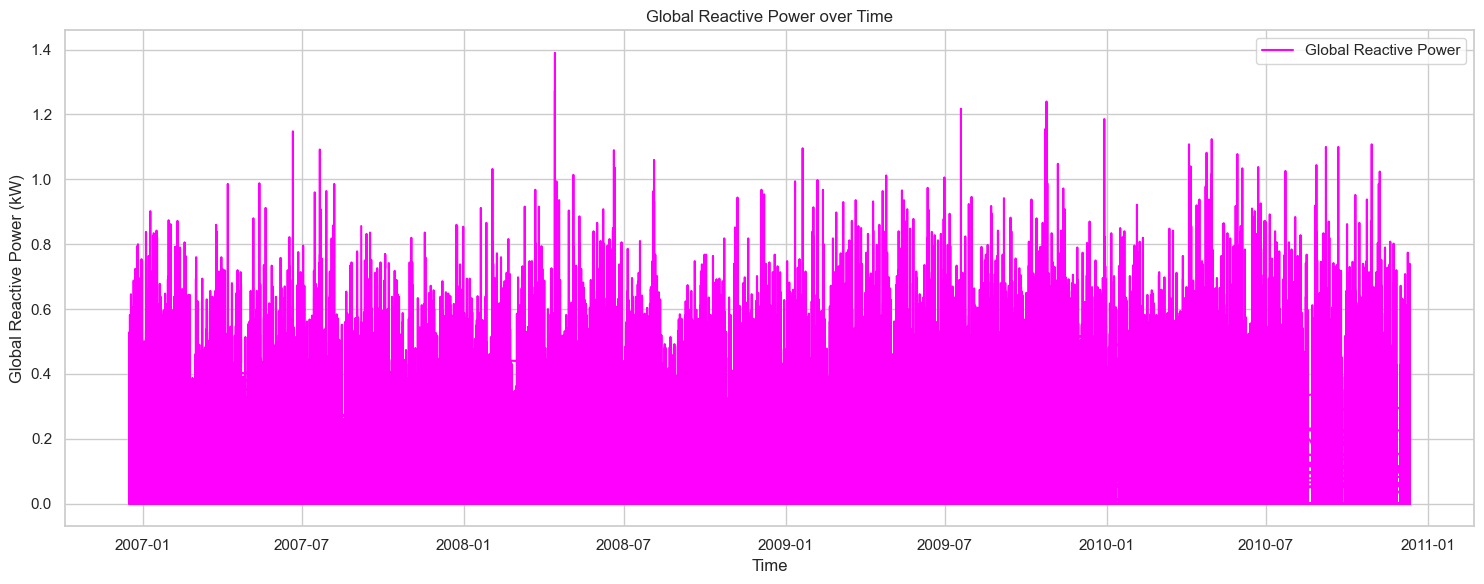

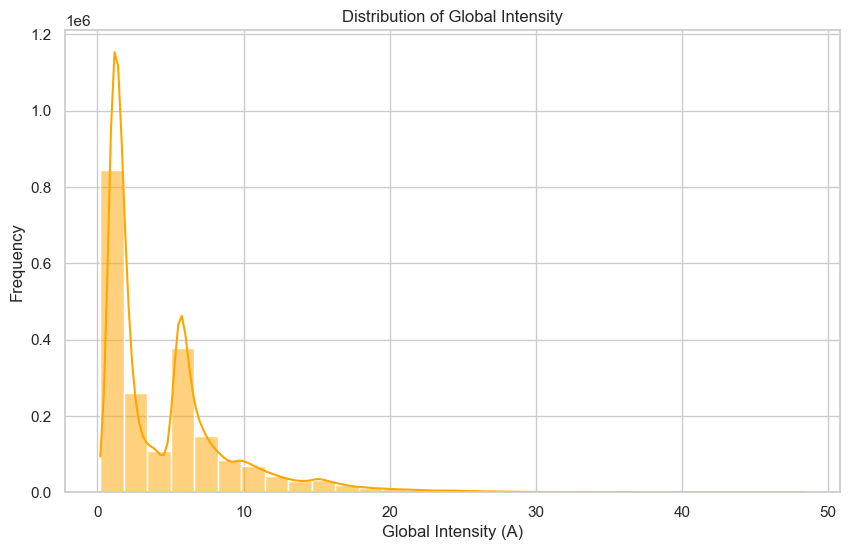

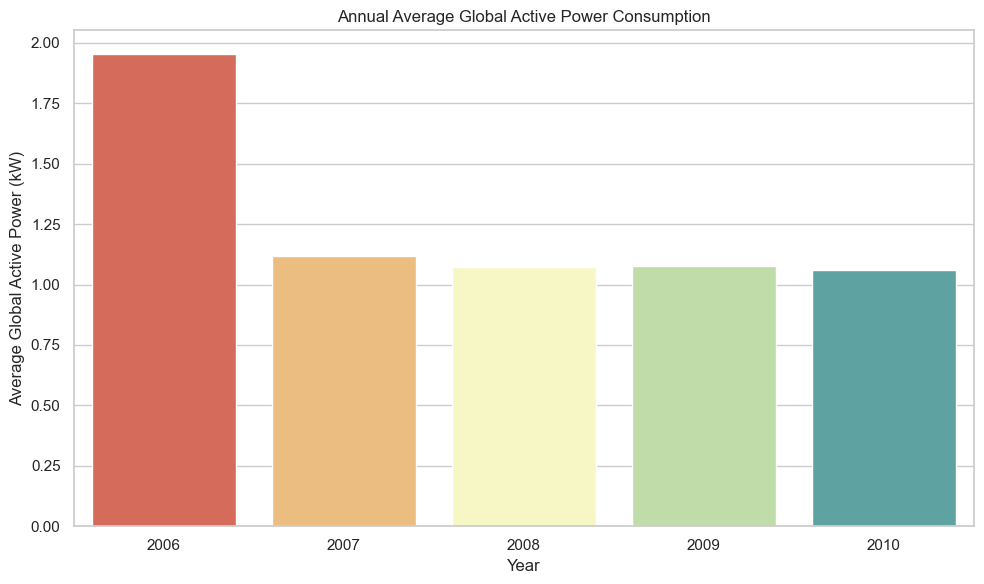

In [8]:
# Global Reactive Power Trends
plt.figure(figsize=(15, 6))
plt.plot(data.index, data['Global_reactive_power'], label='Global Reactive Power', color='magenta')
plt.title('Global Reactive Power over Time')
plt.xlabel('Time')
plt.ylabel('Global Reactive Power (kW)')
plt.legend()
plt.tight_layout()

# Intensity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Global_intensity'], bins=30, kde=True, color='orange')
plt.title('Distribution of Global Intensity')
plt.xlabel('Global Intensity (A)')
plt.ylabel('Frequency')

# Comparison of Daily Average Consumption Across Years
daily_avg_by_year = data.resample('D').mean().reset_index()
daily_avg_by_year['Year'] = daily_avg_by_year['DateTime'].dt.year
yearly_avg_consumption = daily_avg_by_year.groupby('Year')['Global_active_power'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_avg_consumption.index, y=yearly_avg_consumption.values, palette='Spectral')
plt.title('Annual Average Global Active Power Consumption')
plt.xlabel('Year')
plt.ylabel('Average Global Active Power (kW)')

plt.tight_layout()
plt.show()


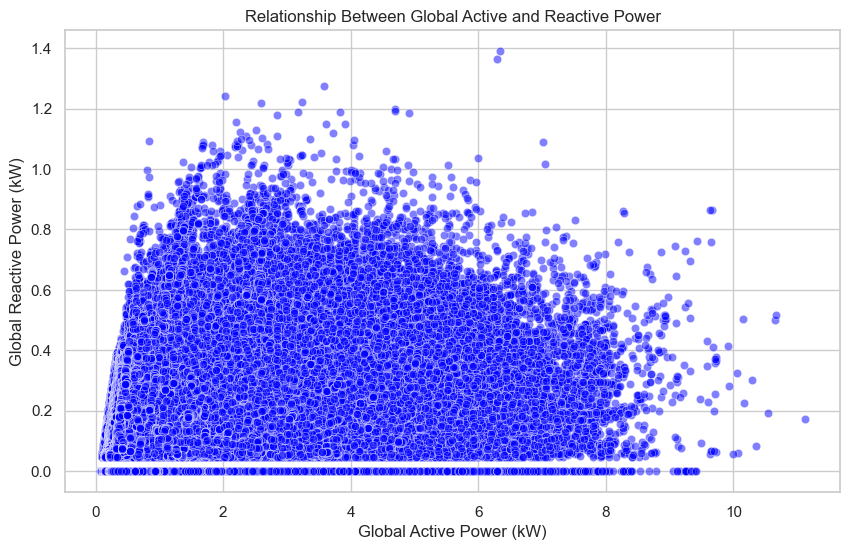

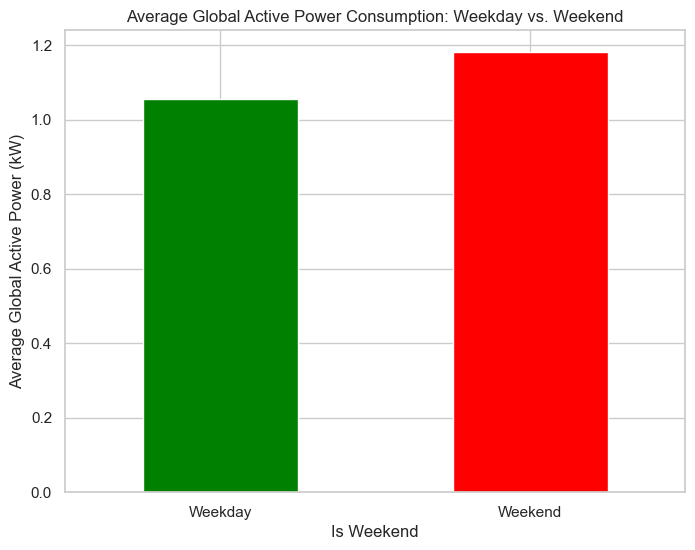

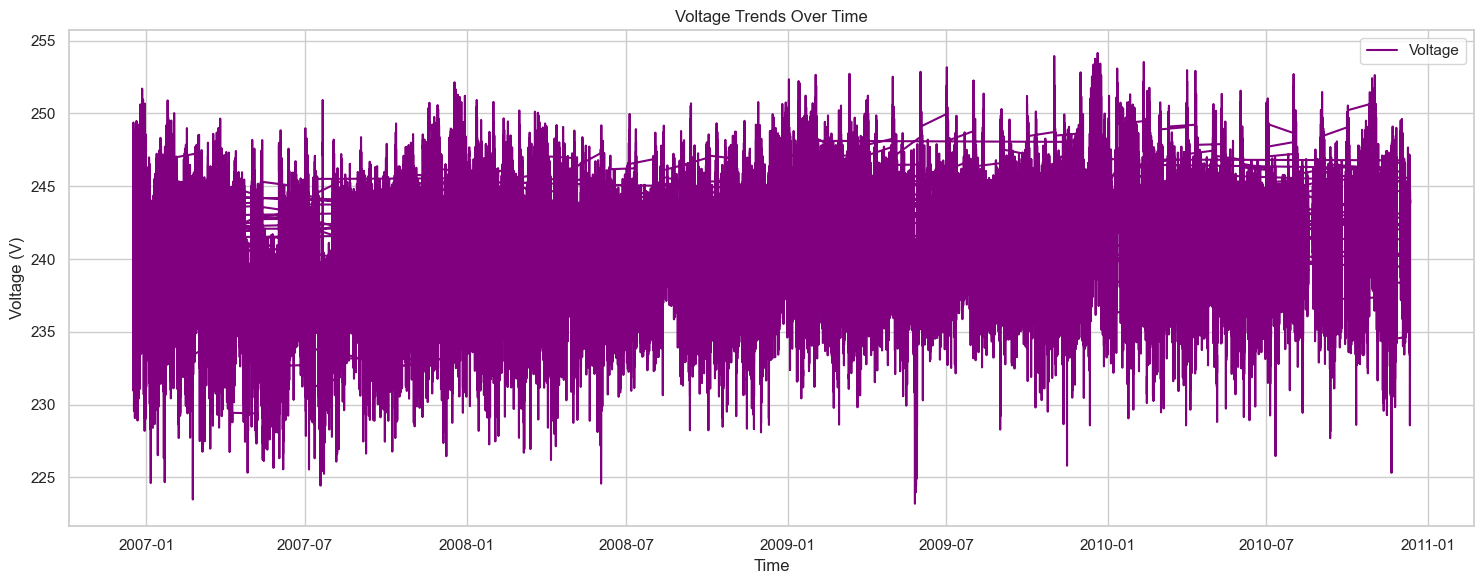

In [9]:
# The Relationship Between Active and Reactive Power
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Global_active_power', y='Global_reactive_power', data=data, color='blue', alpha=0.5)
plt.title('Relationship Between Global Active and Reactive Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Global Reactive Power (kW)')

# Weekday vs. Weekend Consumption Patterns
data['Weekend'] = data['Weekday'].isin([5, 6])  # 5 and 6 correspond to Saturday and Sunday
weekend_comparison = data.groupby('Weekend')['Global_active_power'].mean()
plt.figure(figsize=(8, 6))
weekend_comparison.plot(kind='bar', color=['green', 'red'])
plt.title('Average Global Active Power Consumption: Weekday vs. Weekend')
plt.xlabel('Is Weekend')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], rotation=0)
plt.ylabel('Average Global Active Power (kW)')

# Voltage Trends Over Time
plt.figure(figsize=(15, 6))
plt.plot(data.index, data['Voltage'], label='Voltage', color='purple')
plt.title('Voltage Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.legend()
plt.tight_layout()

plt.show()


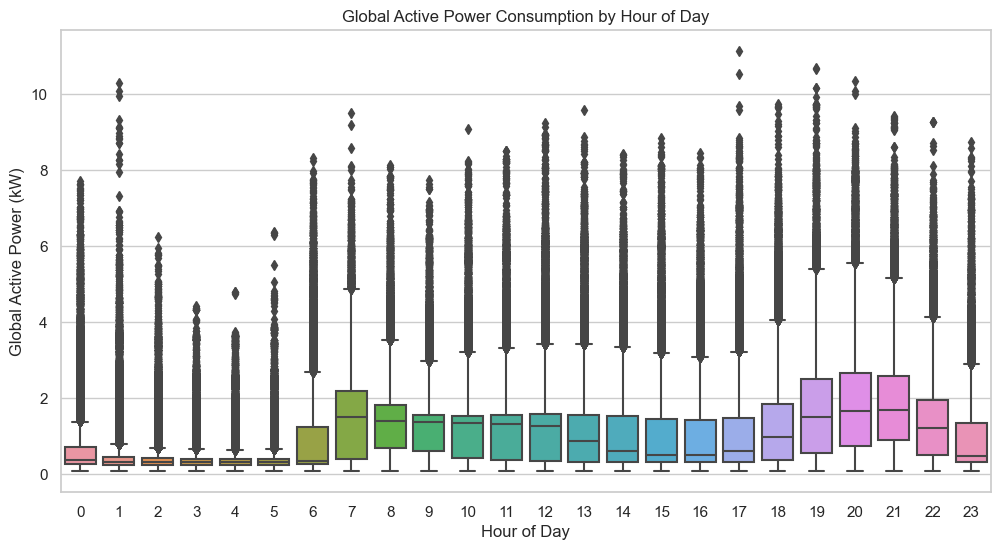

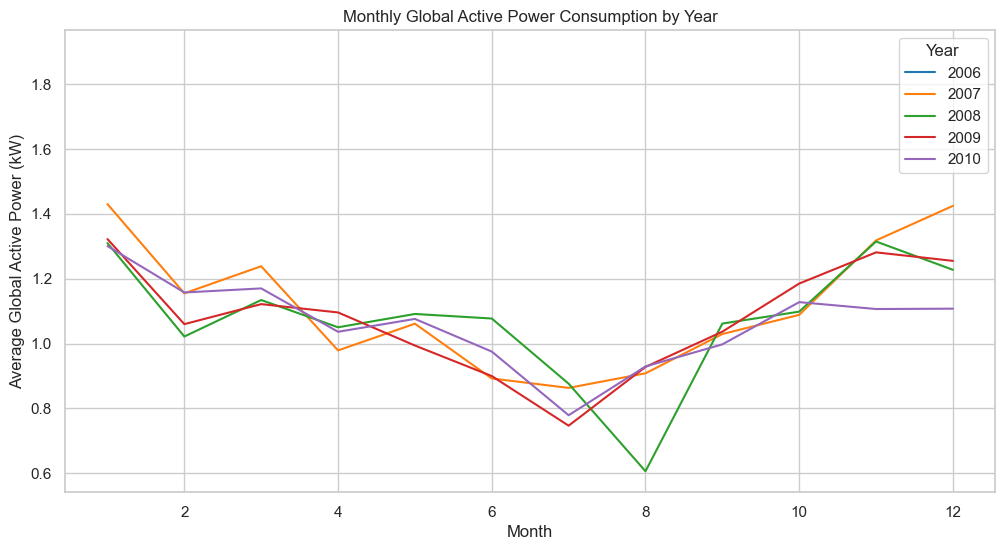

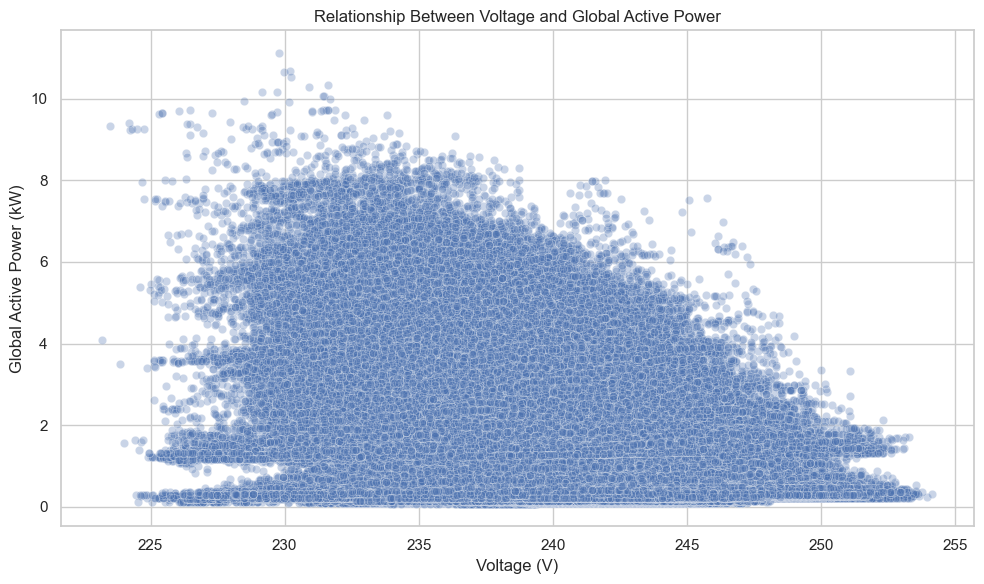

In [10]:
# Peak Consumption Times
plt.figure(figsize=(12, 6))
sns.boxplot(x=data.index.hour, y='Global_active_power', data=data)
plt.title('Global Active Power Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Global Active Power (kW)')

# Energy Consumption by Month and Year
monthly_yearly_avg = data.groupby([data.index.year, data.index.month])['Global_active_power'].mean().unstack(0)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_yearly_avg, palette="tab10", dashes=False)
plt.title('Monthly Global Active Power Consumption by Year')
plt.xlabel('Month')
plt.ylabel('Average Global Active Power (kW)')
plt.legend(title='Year', loc='upper right')

# Impact of Voltage on Global Active Power
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Voltage', y='Global_active_power', data=data, alpha=0.3)
plt.title('Relationship Between Voltage and Global Active Power')
plt.xlabel('Voltage (V)')
plt.ylabel('Global Active Power (kW)')

plt.tight_layout()
plt.show()


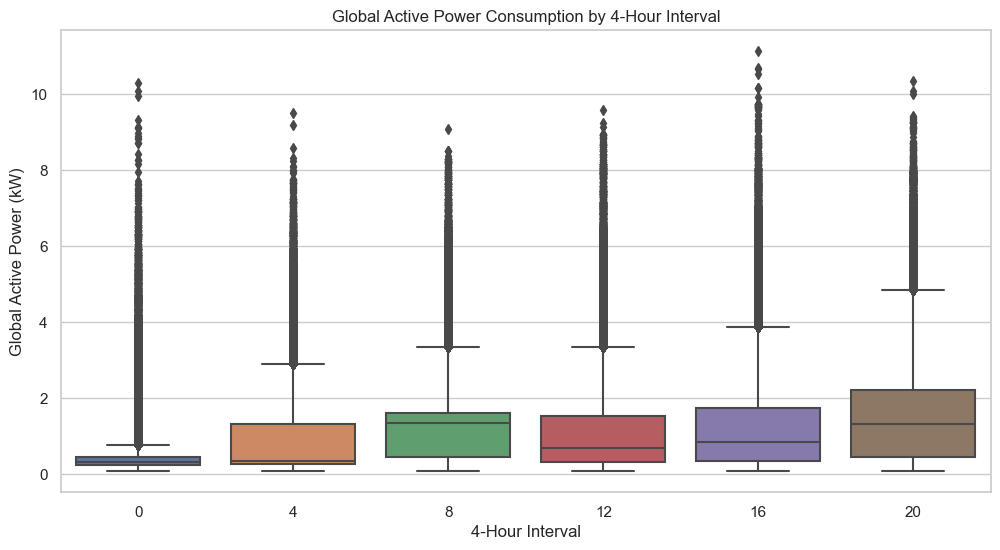

In [11]:
data['hour_of_day'] = data.index.hour
data['4_hour_interval'] = (data['hour_of_day'] // 4) * 4

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='4_hour_interval', y='Global_active_power', data=data)
plt.title('Global Active Power Consumption by 4-Hour Interval')
plt.xlabel('4-Hour Interval')
plt.ylabel('Global Active Power (kW)')
plt.show()

# SARIMA

In [12]:
daily_data = data['Global_active_power'].resample('D').mean()

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(daily_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))

In [14]:
model_fit = model.fit(disp=False)


In [15]:
forecast = model_fit.forecast(steps=60)


In [16]:
# Splitting the dataset into train and test sets based on the specified date
train_daily = daily_data[daily_data.index < '2010-10-01']
test_daily = daily_data[daily_data.index >= '2010-10-01']

# Auto-Arimna

In [17]:
from pmdarima import auto_arima
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming 'train_daily' and 'test_daily' are your training and testing datasets
# and are already defined in your environment.

# Impute missing values with the mean
train_daily_filled = train_daily.fillna(train_daily.mean())
test_daily_filled = test_daily.fillna(test_daily.mean())

# Fit the auto_arima model to the training data
auto_model = auto_arima(train_daily_filled,
                        seasonal=True, 
                        m=7,  # Adjust for the seasonality of your data, 7 for weekly
                        d=1, D=1,  # Initial differencing. Let auto_arima optimize this.
                        stepwise=True,  # Faster search
                        trace=True,  # Print model fitting information
                        error_action='ignore',  # Ignore orders that don't work
                        suppress_warnings=True,  # Suppress convergence warnings
                        information_criterion='aic')  # Use AIC to select best model

print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[7]             : AIC=inf, Time=2.47 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2497.127, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1932.457, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=1.07 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=2318.450, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=1732.335, Time=0.28 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=2.44 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=1.35 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=1917.011, Time=0.16 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=1661.102, Time=0.35 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=1863.321, Time=0.20 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=2.88 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=1.13 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=1631.610, Time=0.42 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=1837.898, Time=0.22 s

Test RMSE: 0.6175361388676532


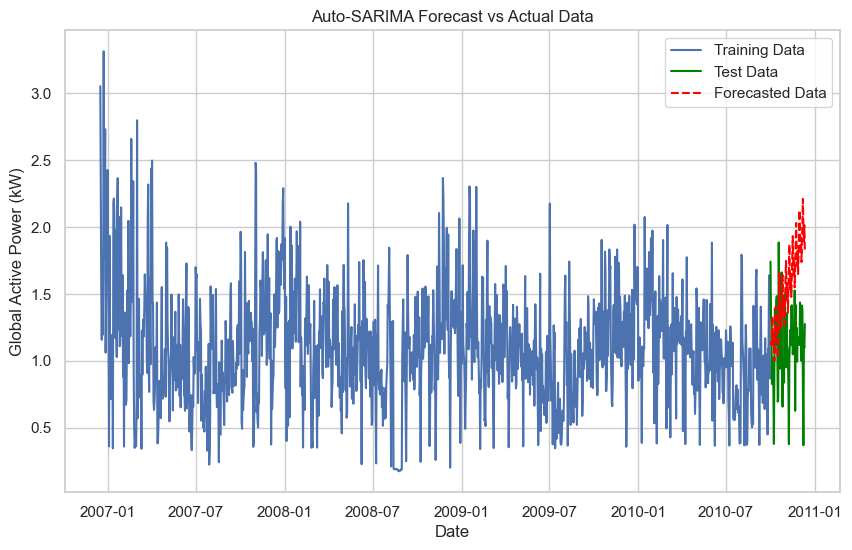

In [18]:
# Forecast the same number of steps as in the test set
forecast_auto = auto_model.predict(n_periods=len(test_daily_filled))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_daily_filled, forecast_auto))
print(f'Test RMSE: {rmse}')

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_daily_filled.index, train_daily_filled, label='Training Data')
plt.plot(test_daily_filled.index, test_daily_filled, label='Test Data', color='green')
plt.plot(test_daily.index, forecast_auto, label='Forecasted Data', color='red', linestyle='--')
plt.title('Auto-SARIMA Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
import numpy

In [24]:
# Recalculate the metrics with the correctly aligned arrays
mae = mean_absolute_error(test_daily_filled, forecast_auto)
rmse = np.sqrt(mean_squared_error(test_daily_filled.values, forecast_auto.values))
corr_matrix = numpy.corrcoef(test_daily_filled.values, forecast_auto.values)
corr = corr_matrix[0,1]
r2 = corr**2

In [25]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.5284791810790269
Root Mean Square Error (RMSE): 0.6175361388676532
R-squared (R2): 0.003701604880236301


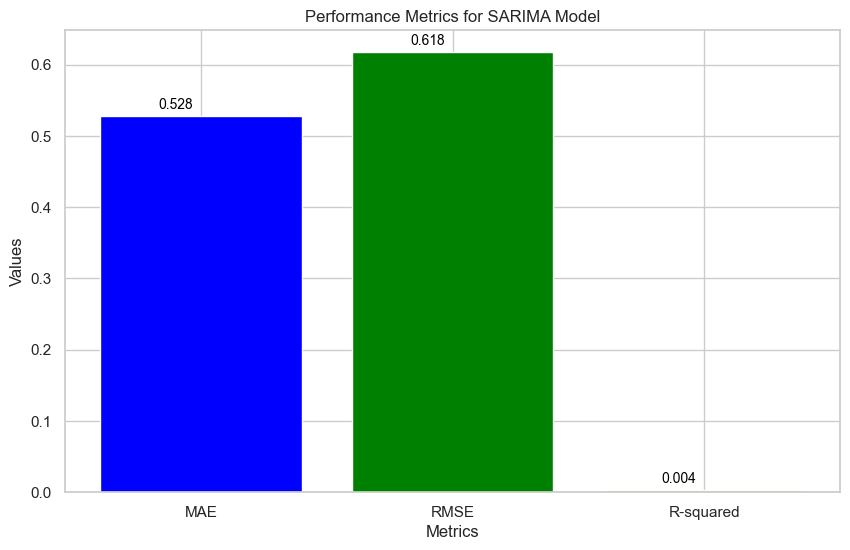

In [26]:
import matplotlib.pyplot as plt

# Metrics
mae = 0.5284791810790269
rmse = 0.6175361388676532
r_squared = 0.003701604880236301

# Plotting
metrics = ['MAE', 'RMSE', 'R-squared']
values = [mae, rmse, r_squared]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title('Performance Metrics for SARIMA Model')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Adding values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{value:.3f}', ha='center', color='black', fontsize=10)

plt.show()


# NBEATS

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.5 K     Non-trainable params
6.2 M     Total params
49.956    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

MAE: 0.27149883987351103


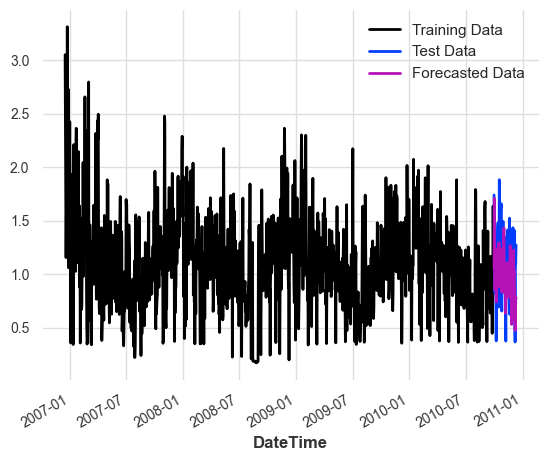

In [27]:
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.metrics import mae
import matplotlib.pyplot as plt

# Assuming you have 'train_daily_filled' and 'test_daily_filled' as your training and testing data

# Convert the pandas series into TimeSeries objects for darts
train_series = TimeSeries.from_series(train_daily_filled)
test_series = TimeSeries.from_series(test_daily_filled)

# Initialize and train the N-BEATS model
model = NBEATSModel(input_chunk_length=30, output_chunk_length=15, n_epochs=100, random_state=42)
model.fit(train_series, verbose=True)

# Predict the next len(test_daily_filled) periods
prediction = model.predict(len(test_daily_filled))

# Evaluate the model using MAE (Mean Absolute Error) or other metrics
error = mae(test_series, prediction)

print(f'MAE: {error}')

# Plot the results
train_series.plot(label='Training Data')
test_series.plot(label='Test Data')
prediction.plot(label='Forecasted Data')
plt.legend()


In [29]:
# Extract the actual and predicted values as NumPy arrays
actual_values = test_series.values().flatten()  # Flatten to ensure it's 1D
predicted_values = prediction.values().flatten()  # Flatten to ensure it's 1D

# Recalculate the metrics with the correctly aligned arrays
mae = mean_absolute_error(actual_values, predicted_values)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
corr_matrix = numpy.corrcoef(actual_values, predicted_values)
corr = corr_matrix[0,1]
r2 = corr**2

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.27149883987351103
Root Mean Square Error (RMSE): 0.3355070624955623
R-squared (R2): 0.10180552121719673


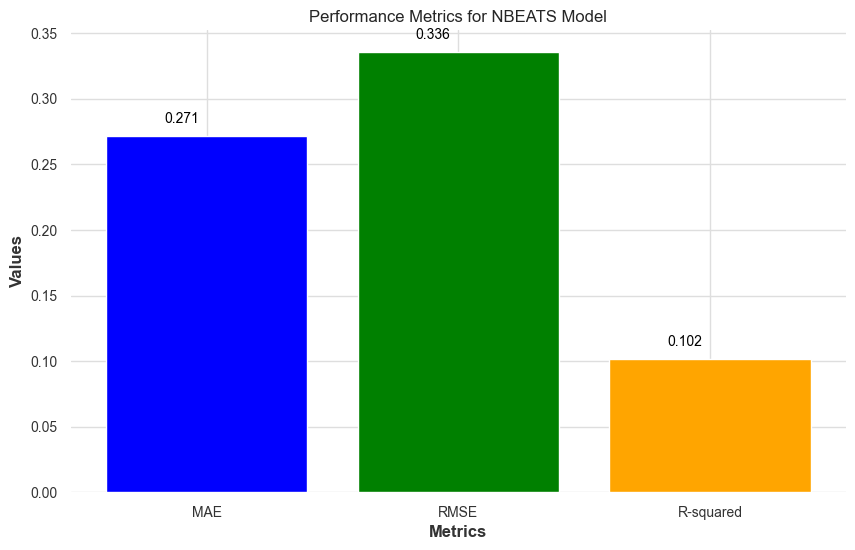

In [30]:
import matplotlib.pyplot as plt

# Metrics
mae = 0.27149883987351103
rmse = 0.3355070624955623
r_squared = 0.10180552121719673

# Plotting
metrics = ['MAE', 'RMSE', 'R-squared']
values = [mae, rmse, r_squared]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title('Performance Metrics for NBEATS Model')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Adding values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{value:.3f}', ha='center', color='black', fontsize=10)

plt.show()


# LSTM

In [31]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Assuming train_daily_filled and test_daily_filled are your training and testing datasets.
# Normalize the data
scaler = MinMaxScaler()
scaler.fit(train_daily_filled.values.reshape(-1, 1))
train_scaled = scaler.transform(train_daily_filled.values.reshape(-1, 1))
test_scaled = scaler.transform(test_daily_filled.values.reshape(-1, 1))

# Generate sequences for training
input_sequence_length = 30  # Length of the input sequences
n_features = 1  # Number of features (univariate time series)

generator = TimeseriesGenerator(train_scaled, train_scaled, length=input_sequence_length, batch_size=1)

In [32]:
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [33]:
# Define a more complex LSTM model
model_complex = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(input_sequence_length, n_features)),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

model_complex.compile(optimizer='adam', loss='mse')

model_complex.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 30, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 72301 (282.43 KB)
Trainable params: 72301 

In [34]:
# Train the model
model_complex.fit(generator, epochs=100)


Epoch 1/100
1355/1355 [==============================] - 9s 6ms/step - loss: 0.0180
Epoch 2/100
1355/1355 [==============================] - 8s 6ms/step - loss: 0.0158
Epoch 3/100
1355/1355 [==============================] - 8s 6ms/step - loss: 0.0154
Epoch 4/100
1355/1355 [==============================] - 8s 6ms/step - loss: 0.0147
Epoch 5/100
1355/1355 [==============================] - 8s 6ms/step - loss: 0.0143
Epoch 6/100
1355/1355 [==============================] - 8s 6ms/step - loss: 0.0139
Epoch 7/100
1355/1355 [==============================] - 8s 6ms/step - loss: 0.0137
Epoch 8/100
1355/1355 [==============================] - 8s 6ms/step - loss: 0.0137
Epoch 9/100
1355/1355 [==============================] - 7s 5ms/step - loss: 0.0137
Epoch 10/100
1355/1355 [==============================] - 7s 5ms/step - loss: 0.0133
Epoch 11/100
1355/1355 [==============================] - 7s 5ms/step - loss: 0.0134
Epoch 12/100
1355/1355 [==============================] - 7s 5ms/step - lo

1/1 [==============================] - 0s 7ms/step


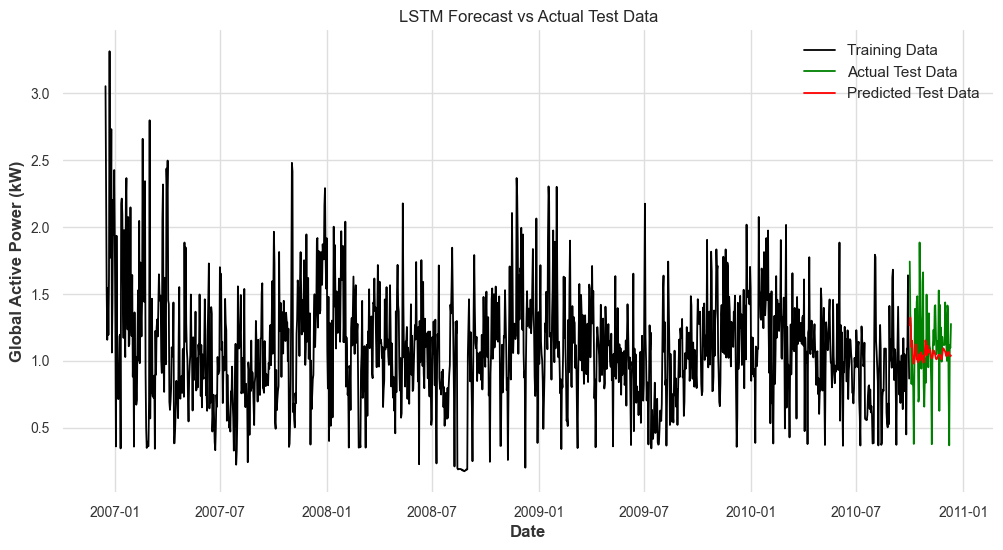

In [36]:
# Initialize a list to hold the predictions
predictions = []

# Start the prediction process from the end of the training set
current_batch = train_scaled[-input_sequence_length:].reshape((1, input_sequence_length, n_features))

# Predict each point in the test set iteratively
for i in range(len(test_daily_filled)):
    # Predict the next point
    current_pred = model_complex.predict(current_batch)[0]
    
    # Append the prediction
    predictions.append(current_pred)
    
    # Update the batch to include the new prediction and drop the oldest point
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

# Invert the scaling to get predictions in the original scale
predictions = scaler.inverse_transform(predictions)

# Align predictions with the test set dates
prediction_dates = test_daily_filled.index

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_daily_filled.index, train_daily_filled, label='Training Data')
plt.plot(test_daily_filled.index, test_daily_filled, label='Actual Test Data', color='green')
plt.plot(prediction_dates, predictions, label='Predicted Test Data', color='red')
plt.title('LSTM Forecast vs Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'predictions' are your model's predictions and 'test_daily_filled' is the actual test data
# Ensure 'predictions' is aligned and comparable to 'test_daily_filled'

# First, you need to make sure that the dimensions match between the actuals and predictions
# Since we generated predictions for each point in the test set, align the actual values accordingly
actual_test_values = test_daily_filled[input_sequence_length:].values.flatten()
predictions_flat = predictions.flatten()

In [39]:
# Assuming the length mismatch is known and we want to align the actual test values and predictions
# Let's align the predictions and the actual values correctly

# If you had skipped some initial values of the test set due to the sequence length, adjust as follows:
# actual_test_values should start from the same point where predictions start

# Correctly aligning actual_test_values with predictions_flat
# Make sure that both arrays start and end at the same points
# Here's an example correction if the lengths are known:
if len(actual_test_values) > len(predictions_flat):
    actual_test_values = actual_test_values[-len(predictions_flat):]
elif len(predictions_flat) > len(actual_test_values):
    predictions_flat = predictions_flat[-len(actual_test_values):]

# Recalculate the metrics with the correctly aligned arrays
mae = mean_absolute_error(actual_test_values, predictions_flat)
rmse = np.sqrt(mean_squared_error(actual_test_values, predictions_flat))
# r2 = r2_score(actual_test_values, predictions_flat)

corr_matrix = numpy.corrcoef(actual_test_values, predictions_flat)
corr = corr_matrix[0,1]
r2 = corr**2


print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 0.18176330104672972
Root Mean Square Error (RMSE): 0.2493164009067676
R-squared (R2): 0.012055412728216036


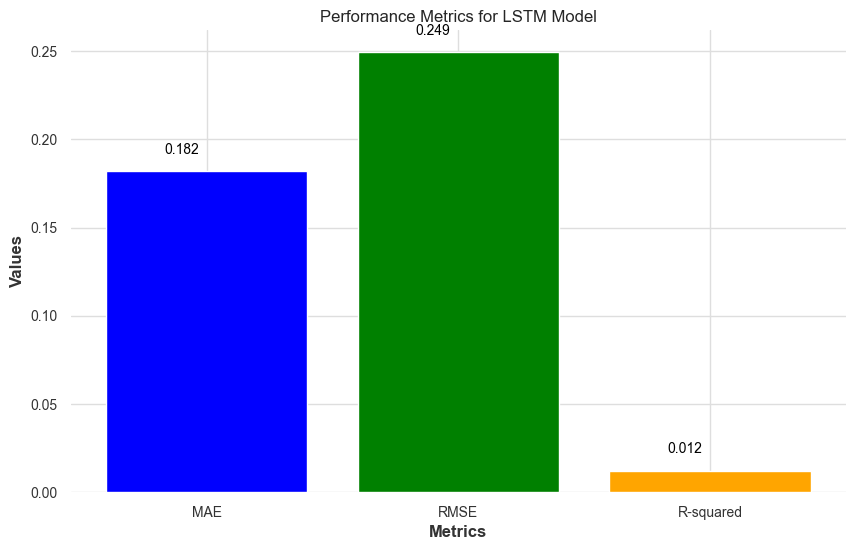

In [40]:
import matplotlib.pyplot as plt

# Metrics
mae = 0.18176330104672972
rmse = 0.2493164009067676
r_squared = 0.012055412728216036

# Plotting
metrics = ['MAE', 'RMSE', 'R-squared']
values = [mae, rmse, r_squared]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title('Performance Metrics for LSTM Model')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Adding values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{value:.3f}', ha='center', color='black', fontsize=10)

plt.show()


# FINAL COMPARISON

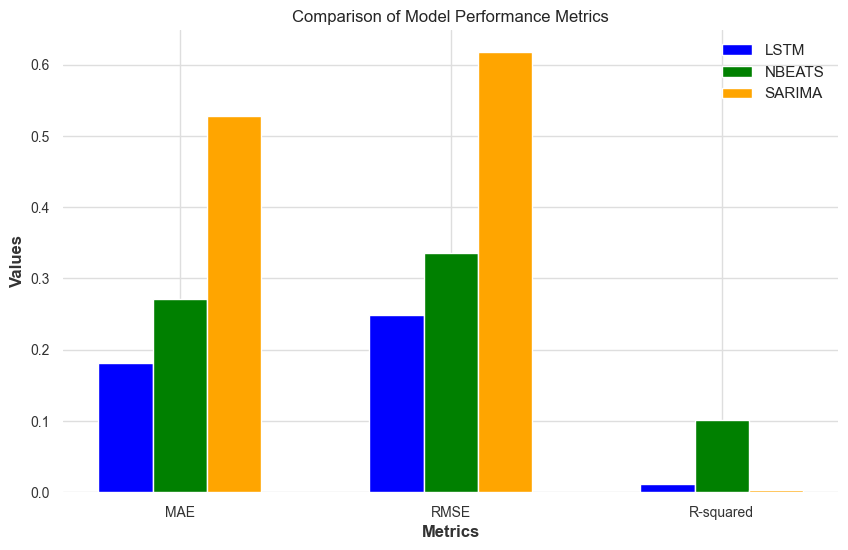

In [41]:
import matplotlib.pyplot as plt

# Metrics for LSTM
lstm_mae =0.18176330104672972
lstm_rmse = 0.2493164009067676
lstm_r_squared = 0.012055412728216036

# Metrics for NBEATS
nbeats_mae = 0.27149883987351103
nbeats_rmse = 0.3355070624955623
nbeats_r_squared = 0.10180552121719673

# Metrics for SARIMA
sarima_mae = 0.5284791810790269
sarima_rmse = 0.6175361388676532
sarima_r_squared = 0.003701604880236301

# Metrics labels
metrics = ['MAE', 'RMSE', 'R-squared']

# Values for each model
lstm_values = [lstm_mae, lstm_rmse, lstm_r_squared]
nbeats_values = [nbeats_mae, nbeats_rmse, nbeats_r_squared]
sarima_values = [sarima_mae, sarima_rmse, sarima_r_squared]

# Bar width
bar_width = 0.2
index = [1, 2, 3]

plt.figure(figsize=(10, 6))

# Plotting bars for LSTM
plt.bar(index, lstm_values, bar_width, label='LSTM', color='blue')

# Plotting bars for NBEATS
plt.bar([i + bar_width for i in index], nbeats_values, bar_width, label='NBEATS', color='green')

# Plotting bars for SARIMA
plt.bar([i + 2 * bar_width for i in index], sarima_values, bar_width, label='SARIMA', color='orange')

# Adding labels
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Model Performance Metrics')
plt.xticks([i + bar_width for i in index], metrics)
plt.legend()
plt.show()
